In [1]:
%env OMP_NUM_THREADS=1
import firedrake as fd
import numpy as np
import matplotlib.pyplot as plt
from scattering import *

env: OMP_NUM_THREADS=1


In [2]:
def dirichlet_bc(k, d):
    def f(x):
        return -np.exp(1j * x.dot(d))
    return f

# Sphere

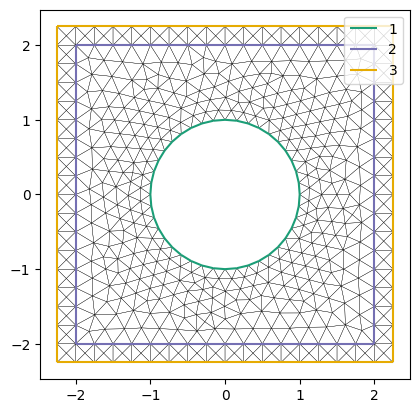

In [3]:
mesh = fd.Mesh("sphere.msh")
plot_mesh(mesh)

In [4]:
c = 340
k = 1
omega = k * c
a0 = b0 = 2.0
a1 = b1 = 2.25
d = np.array([1., 0.])
d /= np.linalg.norm(d)

g_data = dirichlet_bc(k, d)

In [5]:
uh = solve(mesh, k, a1, b1, g_data)

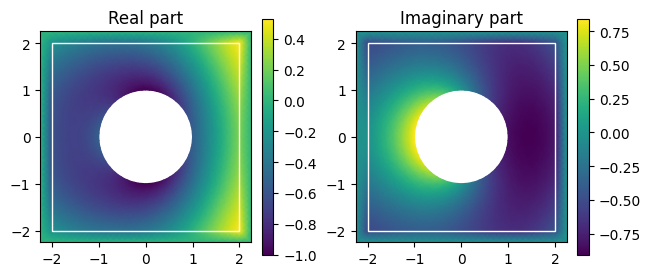

In [6]:
plot_field(uh, a0, a1, b0, b1)

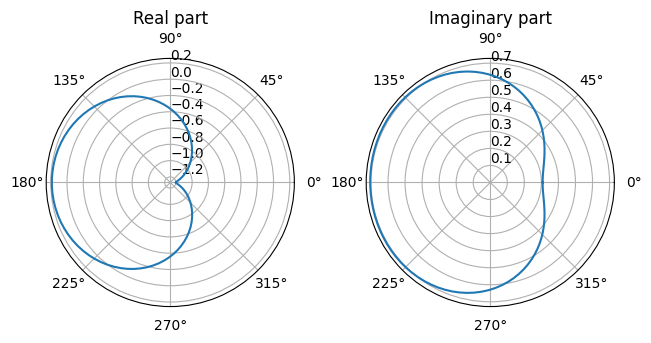

In [7]:
plot_far_field(k, uh)

# Kite

In [8]:
from kite_mesh import *

a0 = b0 = 2.0
a1 = b1 = 2.25
generate_kite_mesh(a0, a1, b0, b1)
mesh = fd.Mesh("kite.msh")

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 20%] Meshing curve 14 (Line)
Info    : [ 20%] Meshing curve 15 (Line)
Info    : [ 20%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 17 (Line)
Info    : [ 20%] Meshing curve 18 (Line)
Info    : [ 20%] Meshing curve 19 (Line)
Info    : [ 20%] Meshing curve 20 (Line)
Info    : [ 20%] Meshing curve 21 (Line)
Info    : [ 20%] Meshing curve 22 (Line)
Info    : [ 20%] Meshing curve 23 (Line)
Info    : [ 20%] Meshing curve 24 (Line)
I

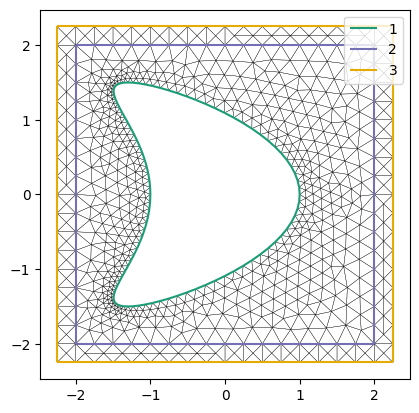

In [9]:
plot_mesh(mesh)

In [10]:
c = 340
k = 1
omega = k * c
d = np.array([1., 0.])
d /= np.linalg.norm(d)

g_data = dirichlet_bc(k, d)

In [11]:
uh = solve(mesh, k, a1, b1, g_data)

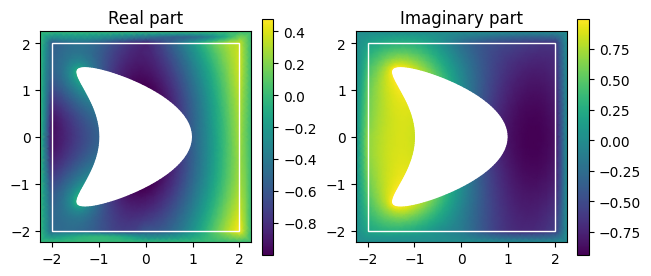

In [12]:
plot_field(uh, a0, a1, b0, b1)

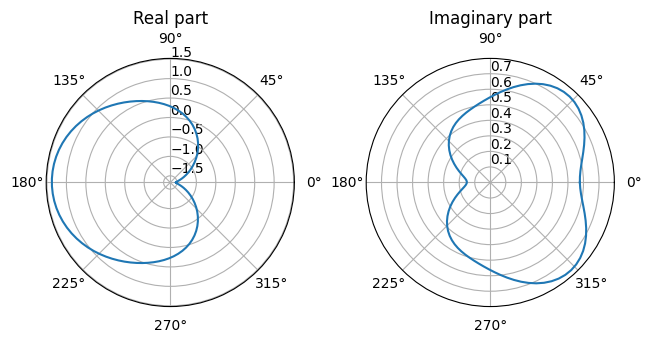

In [13]:
plot_far_field(k, uh)

In [14]:
u_inf_re, u_inf_im = far_field(k, uh, 0)
print("Re{u_inf(d)} =", u_inf_re)
print("Im{u_inf(d)} =", u_inf_im)

Re{u_inf(d)} = -1.5261257966383976
Im{u_inf(d)} = 0.5766101279926189


In [15]:
u_inf_re, u_inf_im = far_field(k, uh, np.pi)
print("Re{u_inf(-d)} =", u_inf_re)
print("Im{u_inf(-d)} =", u_inf_im)

Re{u_inf(-d)} = 1.3747937302391195
Im{u_inf(-d)} = 0.15060748727264212
